In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score

def plot_features_cat_classification(df, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    """
    Grafica la distribución de las clases objetivo para características categóricas en un dataframe,
    filtradas por umbral de información mutua con respecto a la columna objetivo.

    Argumentos:
    df (DataFrame): DataFrame de entrada que contiene características categóricas y la columna objetivo.
    target_col (str): Nombre de la columna objetivo. Por defecto es "".
    columns (list of str): Lista de nombres de columnas a considerar. Si está vacía,
                           se considerarán todas las columnas categóricas en df. Por defecto es [].
    mi_threshold (float): Valor de umbral para la información mutua. Las características con MI
                          mayor que este umbral se considerarán. Por defecto es 0.0.
    normalize (bool): Si se debe normalizar los conteos en el gráfico. Por defecto es False.

    Retorna:
    None
    """
    
    # Verifica si se proporcionó target_col y si está en el dataframe
    if target_col != "" and target_col not in df.columns:
        raise ValueError(f"La columna objetivo '{target_col}' no se encontró en las columnas del dataframe.")

    # Si columns está vacía, selecciona todas las columnas categóricas de df
    if not columns:
        columns = [col for col in df.columns if df[col].dtype == 'object']

    # Valida que las columnas existan en el dataframe
    invalid_cols = [col for col in columns if col not in df.columns]
    if invalid_cols:
        raise ValueError(f"Las columnas {invalid_cols} no se encontraron en las columnas del dataframe.")

    # Selecciona las columnas categóricas basadas en el umbral de información mutua si está especificado
    selected_columns = []
    for col in columns:
        if target_col != "":
            mi = mutual_info_score(df[col], df[target_col])
            if mi > mi_threshold:
                selected_columns.append(col)
        else:
            selected_columns.append(col)

    # Grafica las distribuciones para las columnas categóricas seleccionadas
    for col in selected_columns:
        plt.figure(figsize=(10, 6))
        if normalize:
            sns.countplot(x=col, hue=target_col, data=df, palette='Set2', 
                          edgecolor=sns.color_palette('dark', 1), linewidth=1)
            plt.ylabel('Conteo Normalizado')
        else:
            sns.countplot(x=col, hue=target_col, data=df, palette='Set2', 
                          edgecolor=sns.color_palette('dark', 1), linewidth=1)
            plt.ylabel('Conteo')
        plt.title(f'Distribución de {col} con respecto a {target_col}')
        plt.xticks(rotation=45)
        plt.legend(title=target_col)
        plt.tight_layout()
        plt.show()

# Ejemplo de uso:
# Suponiendo que tienes un dataframe df con las columnas adecuadas
# plot_features_cat_classification(df, target_col="target", columns=["feature1", "feature2"], mi_threshold=0.1, normalize=True)


In [2]:
import numpy as np
import pandas as pd 
from scipy.stats import f_oneway

In [3]:
df1 = pd.read_csv('./data/datasets/lifesat_full.csv', sep=',')
df2 = pd.read_csv('./data/datasets/pima_indians.csv', sep=',') #Target 'class'
df3 = pd.read_csv('./data/datasets/temps.csv', sep=',')
df4 = pd.read_csv('./data/datasets/titanic.csv', sep=',') #Target 'alive'
df5 = pd.read_csv('./data/datasets/CarPrice_Assignment.csv', sep=',') # target 'Price... o eso creo.  
df6 = pd.read_csv('./data/datasets/bank-full.csv', sep=';') #El target parce que es 'y'  
df7 = pd.read_csv('./data/datasets/dataset_viajes_jun23.csv', sep=',') #El target, 'aircompany' por ejemplo.a

In [4]:
df1

,Country,GDP per capita (USD),Life satisfaction,Life expectancy,Homicide rate,Employment rate
0,South Africa,11466.189672,4.725336,57.5,13.7,43.0
1,Colombia,13441.492952,6.302556,76.2,24.5,67.0
2,Brazil,14063.982505,6.415187,74.8,26.7,61.0
3,Mexico,17887.750736,6.536861,75.4,18.1,61.0
4,Chile,23324.524751,6.538143,79.9,4.2,63.0
5,Russia,26456.387938,5.832096,71.8,9.6,70.0
6,Greece,27287.083401,5.433212,81.5,0.8,53.0
7,Turkey,28384.987785,5.530070,78.0,1.4,52.0
8,Latvia,29932.493910,5.918116,74.7,4.8,70.0
9,Hungary,31007.768407,5.633223,76.2,1.0,68.0


In [5]:
df2

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df3

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [7]:
df4

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,32.0,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


ValueError: RGBA sequence should have length 3 or 4

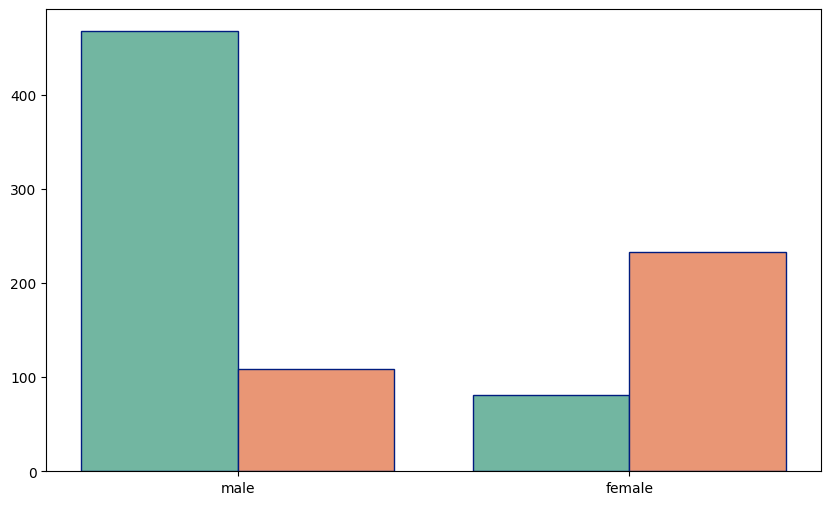

In [10]:
# Ejemplo de uso con el dataset del Titanic
plot_features_cat_classification(df4, target_col="alive", mi_threshold=0.1, normalize=True)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score



# Definir la función plot_features_cat_classification
def plot_features_cat_classification(df, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    """
    Grafica la distribución de las clases objetivo para características categóricas en un dataframe,
    filtradas por umbral de información mutua con respecto a la columna objetivo.

    Argumentos:
    df (DataFrame): DataFrame de entrada que contiene características categóricas y la columna objetivo.
    target_col (str): Nombre de la columna objetivo. Por defecto es "".
    columns (list of str): Lista de nombres de columnas a considerar. Si está vacía,
                           se considerarán todas las columnas categóricas en df. Por defecto es [].
    mi_threshold (float): Valor de umbral para la información mutua. Las características con MI
                          mayor que este umbral se considerarán. Por defecto es 0.0.
    normalize (bool): Si se debe normalizar los conteos en el gráfico. Por defecto es False.

    Retorna:
    None
    """
    
    # Verifica si se proporcionó target_col y si está en el dataframe
    if target_col != "" and target_col not in df.columns:
        raise ValueError(f"La columna objetivo '{target_col}' no se encontró en las columnas del dataframe.")

    # Si columns está vacía, selecciona todas las columnas categóricas de df
    if not columns:
        columns = [col for col in df.columns if df[col].dtype == 'object']

    # Valida que las columnas existan en el dataframe
    invalid_cols = [col for col in columns if col not in df.columns]
    if invalid_cols:
        raise ValueError(f"Las columnas {invalid_cols} no se encontraron en las columnas del dataframe.")

    # Selecciona las columnas categóricas basadas en el umbral de información mutua si está especificado
    selected_columns = []
    for col in columns:
        if target_col != "":
            mi = mutual_info_score(df[col], df[target_col])
            if mi > mi_threshold:
                selected_columns.append(col)
        else:
            selected_columns.append(col)

    # Grafica las distribuciones para las columnas categóricas seleccionadas
    for col in selected_columns:
        plt.figure(figsize=(10, 6))
        if normalize:
            sns.countplot(x=col, hue=target_col, data=df, palette='Set2', edgecolor='black')
            plt.ylabel('Conteo Normalizado')
        else:
            sns.countplot(x=col, hue=target_col, data=df, palette='Set2', edgecolor='black')
            plt.ylabel('Conteo')
        plt.title(f'Distribución de {col} con respecto a {target_col}')
        plt.xticks(rotation=45)
        plt.legend(title=target_col)
        plt.tight_layout()
        plt.show()




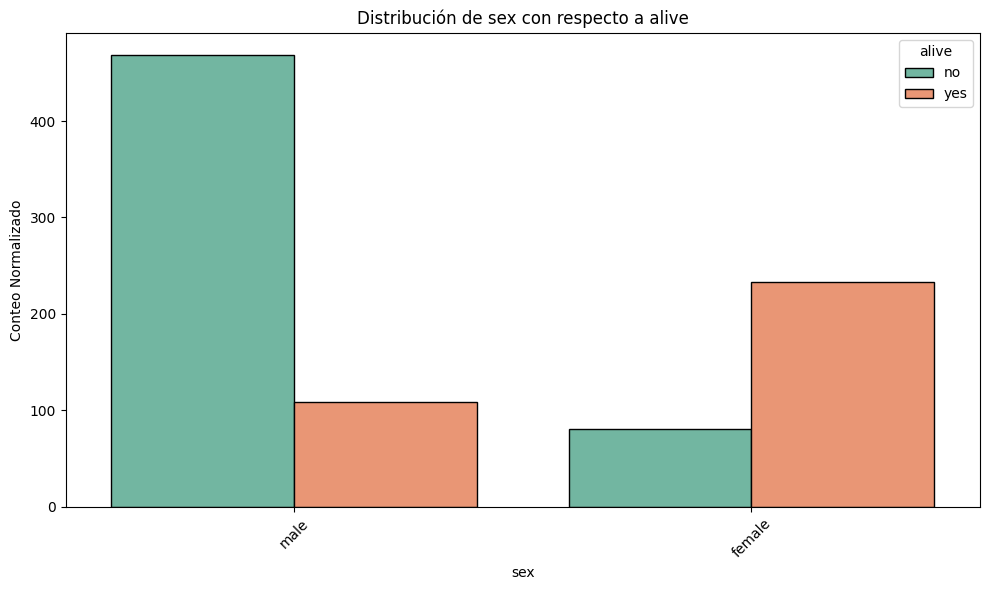

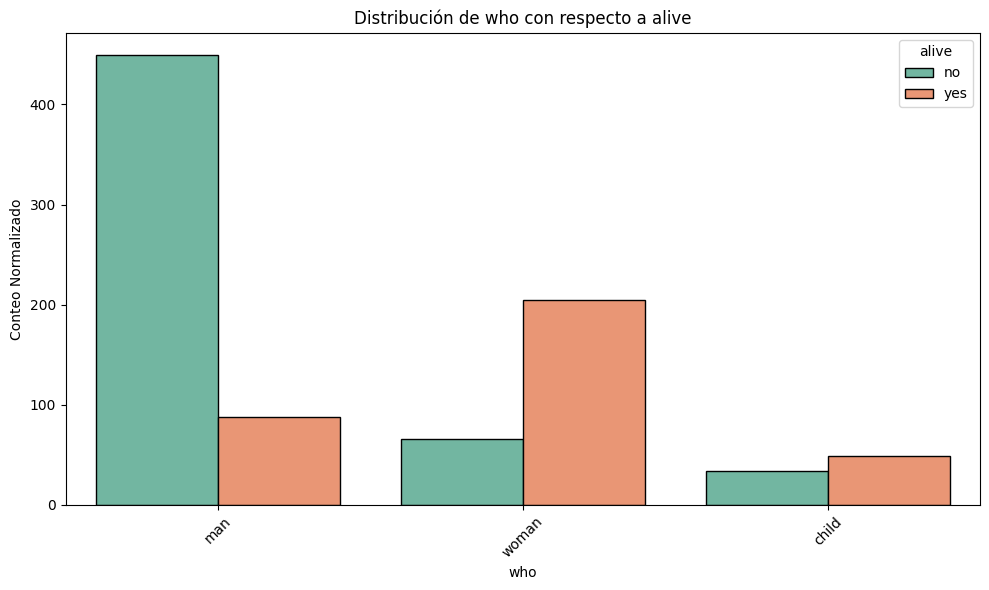

C:\Users\ferna\AppData\Local\Temp\ipykernel_15820\2991367766.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


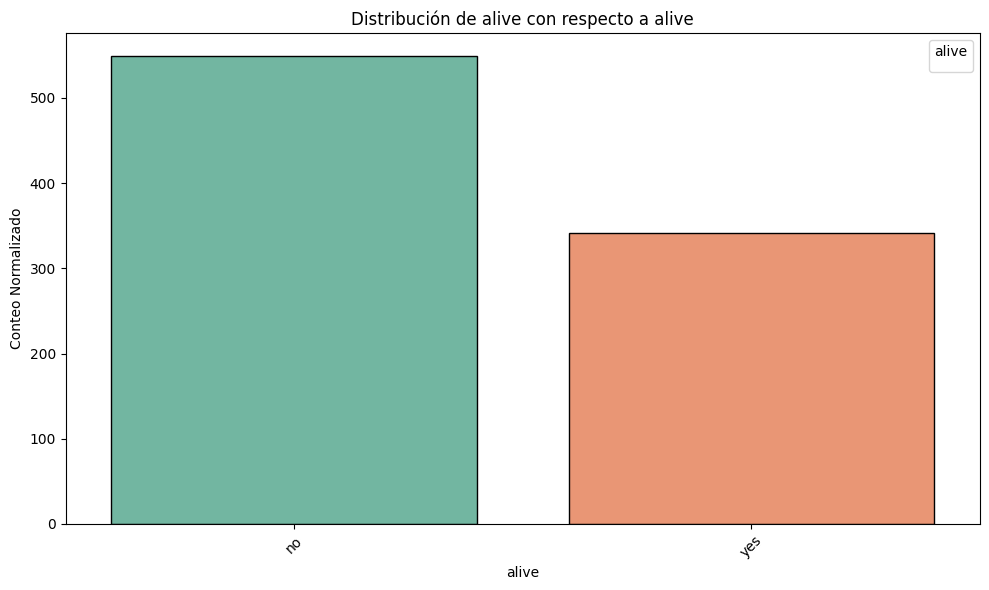

In [12]:
# Ejemplo de uso con el dataset del Titanic
plot_features_cat_classification(df4, target_col="alive", mi_threshold=0.1, normalize=True)